## Runge-Kutta 4th Order Method

Our goal is to implement the fourth order Runge-Kutta method commonly refered to as RK4. We will compare its accuracy to those of the forward Euler and explicit trapezoidal methods.

In [2]:
import numpy as np
import scipy.integrate
import numpy.linalg
import matplotlib.pyplot as plt

def degradation_model( t, y, params ):
    y1 = y[0]
    y2 = y[1]
    dydt = np.zeros( (2,) )
    dydt[0] = -params[0] * y1
    dydt[1] = -params[1] * y2
    return dydt

In [3]:
def forwardEuler( fn, t, y0, params ):
    """ [t,y] = forwardEuler( fn, t, y0, params )
    Given a function handle fn for dydt, find the value of
    y at timepoints t, given y(0) = y0.
    fn takes t, y, and params as input.
    t is 1-dimensional (NT,)
    y is 2-dimensional (NY,NT)
    """
    y = np.zeros( (y0.size,t.size) )
    y[:,0] = y0;
    for i in range(1,t.size):
        h = t[i]-t[i-1];
        yprime = fn(t[i-1],y[:,i-1],params);
        y[:,i] = y[:,i-1] + h*yprime;
    
    return (t,y)

def explicitTrapezoidal( fn, t, y0, params ):
    """[t,y] = explicitTrapezoidal( fn, t, y0, params )
    Given a function handle fn for y', find the value of
    y at timepoints t, assuming y(0) = y0.
    fn takes t, y, and params as input.
    t is 1-dimensional (NT,)
    y is 2-dimensional (NY,NT)
    """
    y = np.zeros( (y0.size,t.size) )
    y[:,0] = y0;
    for i in range(1,t.size):
        h = t[i]-t[i-1];
        yprime = fn(t[i-1],y[:,i-1],params);
        yhatFE = y[:,i-1] + h*yprime;
        yprimehatFE = fn(t[i],yhatFE,params);
        y[:,i] = y[:,i-1] + h/2*(yprime+yprimehatFE);

    return (t,y)

### Implement the method

\begin{eqnarray*}
f_1 &=& f\left(t,\widehat{y}(t)\right)\\
f_2 &=& f\left(t+\frac{\Delta t}{2}, \widehat{y}(t) + \frac{\Delta t}{2} f_1\right)\\
f_3 &=& f\left(t+\frac{\Delta t}{2}, \widehat{y}(t) + \frac{\Delta t}{2} f_2\right)\\
f_4 &=& f\left(t+\Delta t, \widehat{y}(t) + \Delta t f_3 \right)\\
\widehat{y}(t + \Delta t)&=& \widehat{y}(t) + \frac{\Delta t}{6} \cdot (f_1 + 2f_2 + 2f_3 + f_4)\\
\end{eqnarray*}

In [4]:
def RK4( fn, t, y0, params ):
    """
    [t,y] = RK4( fn, t, y0, params )
    Given a function handle fn for y', find the value of
    y at timepoints t, assuming y(0) = y0.
    fn takes t, y, and params as input.
    Uses a 4th order explicit Runge-Kutta method
    """
    y = np.zeros( (y0.size,t.size) )
    y[:,0] = y0;
    for i in range(1,t.size):
        h = t[i]-t[i-1];
        f1 = fn(t[i-1],y[:,i-1],params);
        f2 = fn(t[i-1]+h/2,y[:,i-1]+0.5*h*f1,params);
        f3 = fn(t[i-1]+h/2,y[:,i-1]+0.5*h*f2,params);
        f4 = fn(t[i],y[:,i-1]+h*f3,params);
        y[:,i] = y[:,i-1] + h/6*(f1+2*f2+2*f3+f4);
    return (t,y)

### Run and plot result from RK4.

Run the RK4 method on the degradation model with degradation rates (2,5) and initial conditions (1,1) with time beginning at 0 and ending at 2.

Then plot the true solution (solid lines) and the forward Euler's solution (dashed lines), explicit Trapezoidal's solution (dotted lines), and RK4' solution (dash-dotted lines).

Then plot the difference over time between the true solution and each of the other methods.

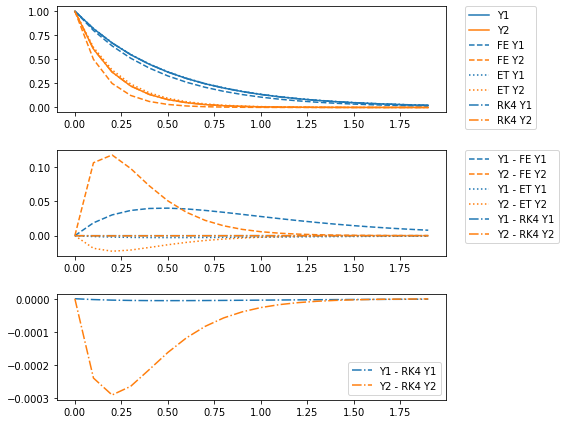

In [5]:
params = (2,5)
y0 = np.array([1,1])
dt = 0.1
t = np.arange(0,2,dt)
(tFE,yFE) = forwardEuler( degradation_model, t, y0, params)
(tET,yET) = explicitTrapezoidal( degradation_model, t, y0, params)
(t,y) = RK4( degradation_model, t, np.array([1,1]), params)
tru_y1 = y0[0]*np.exp(-params[0]*t)
tru_y2 = y0[1]*np.exp(-params[1]*t)
tru_y = np.vstack( ( tru_y1, tru_y2) )

plt.figure( figsize = (8,6) )
plt.subplot(3,1,1)
plt.plot( t, tru_y.T )
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot( tFE, yFE.T, '--' );
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot( tET, yET.T, ':' );
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot( t, y.T, '-.' );
plt.legend(['Y1','Y2','FE Y1','FE Y2','ET Y1','ET Y2','RK4 Y1','RK4 Y2'],
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., )

plt.subplot( 3, 1, 2)
plt.plot( t, tru_y.T-yFE.T, '--' );
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot( t, tru_y.T-yET.T, ':' );
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot( t, tru_y.T-y.T, '-.' );
plt.legend(['Y1 - FE Y1','Y2 - FE Y2','Y1 - ET Y1','Y2 - ET Y2','Y1 - RK4 Y1','Y2 - RK4 Y2'],
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., )
plt.subplot( 3, 1, 3)
plt.plot( t, tru_y.T-y.T, '-.' );
plt.legend(['Y1 - RK4 Y1','Y2 - RK4 Y2'])
plt.tight_layout()

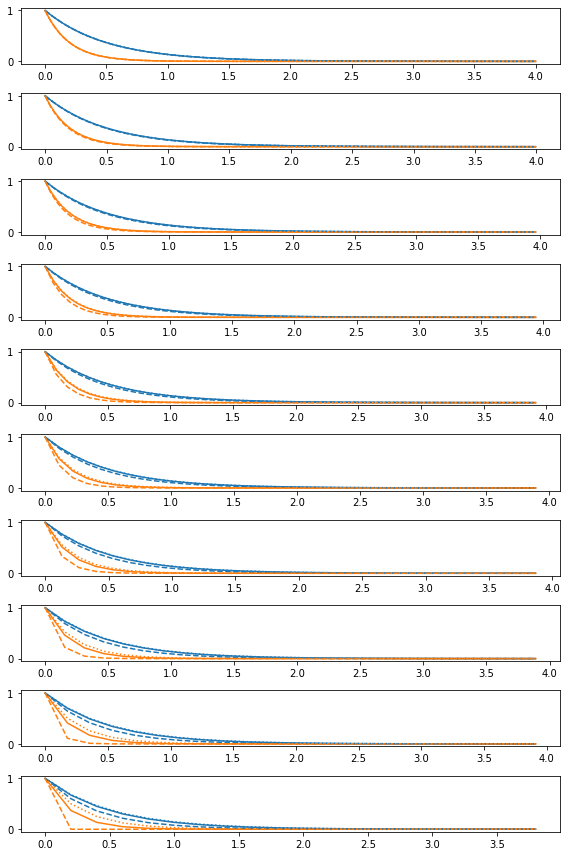

In [6]:
# range from smallest timestep that doesn't take way too long to run to largest time step with qualitatively correct answer.
dts = np.linspace(1e-4,0.2,10)
errFE = np.zeros( (dts.size,) )
errET = np.zeros( (dts.size,) )
errRK4 = np.zeros( (dts.size,) )
params = (2,5)
y0 = np.array((1,1))

plt.figure(figsize=(8,12))
for i in range(dts.size):
    t = np.arange(0,4,dts[i])
    sol = scipy.integrate.solve_ivp(fun=degradation_model, t_span=(0,4), y0=y0, method='LSODA', rtol=1e-8, atol=1e-8, t_eval=t, args=[params] )
    (t,y) = forwardEuler( degradation_model, t, y0, params)
    plt.subplot( dts.size, 1, i+1 )
    plt.plot( t, sol.y.T )
    plt.gca().set_prop_cycle(None) # this resets the color cycle
    plt.plot( t, y.T, '--')
    errFE[i] = np.mean(scipy.linalg.norm( sol.y-y, 2, axis=0) )
    plt.gca().set_prop_cycle(None) # this resets the color cycle
    (t,y) = explicitTrapezoidal( degradation_model, t, y0, params)
    plt.plot( t, y.T, ':')
    errET[i] = np.mean(scipy.linalg.norm( sol.y-y, 2, axis=0) )
    (t,y) = RK4( degradation_model, t, y0, params)
    errRK4[i] = np.mean(scipy.linalg.norm( sol.y-y, 2, axis=0) )
plt.tight_layout()
    


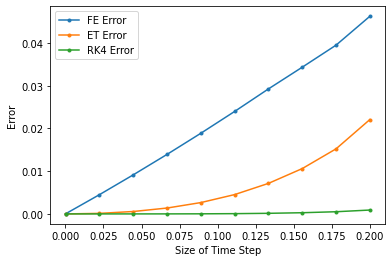

In [7]:
plt.figure()
plt.plot( dts, errFE, 'C0.-' );
plt.plot( dts, errET, 'C1.-' );
plt.plot( dts, errRK4, 'C2.-' );
plt.legend( ['FE Error','ET Error','RK4 Error']);
plt.xlabel( 'Size of Time Step');
plt.ylabel( 'Error');

## Bonus Code
### Examine substeps

Examine the substeps taken to get the final slope estimate.

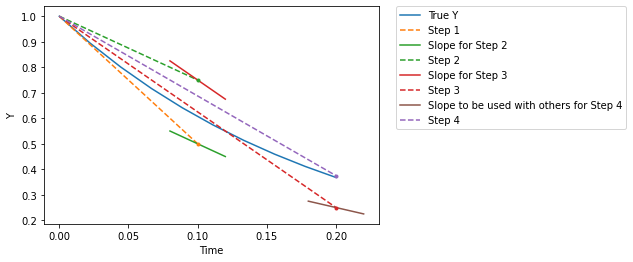

In [9]:
fn = lambda t, y, params: -params[0]*y
params = (5,)
y0 = 1
t0 = 0
h = 0.2
tru_t = np.linspace( t0, t0+h, 10 )
tru_y = y0*np.exp(-params[0]*tru_t)

f1 = fn(t0,y0,params);
k1_t = t0+h/2
k1_y = y0+0.5*h*f1
f2 = fn(k1_t,k1_y,params);
k2_t = t0+h/2
k2_y = y0+0.5*h*f2
f3 = fn(k2_t,k2_y,params);
k3_t = t0+h
k3_y = y0+h*f3
f4 = fn(k3_t,k3_y,params);
kf_y = y0 + h/6*(f1+2*f2+2*f3+f4);
kf_t = t0 + h
eps = h/10;

plt.plot( tru_t, tru_y.T, 'C0' ); # true Y
plt.plot( [t0,k1_t], [y0,k1_y], 'C1--' ); # Step 1
plt.plot( [k1_t-eps,k1_t+eps], [k1_y-eps*f2,k1_y+eps*f2], 'C2') # slope for step 2
plt.plot( [t0,k2_t], [y0,k2_y], 'C2--' );
plt.plot( [k2_t-eps,k2_t+eps], [k2_y-eps*f3,k2_y+eps*f3], 'C3')
plt.plot( [t0,k3_t], [y0,k3_y], 'C3--' );
plt.plot( [k3_t-eps,k3_t+eps], [k3_y-eps*f4,k3_y+eps*f4], 'C5')
plt.plot( [t0,kf_t], [y0,kf_y], 'C4--' );
plt.plot( k1_t, k1_y, 'C1.')
plt.plot( k2_t, k2_y, 'C2.')
plt.plot( k3_t, k3_y, 'C3.')
plt.plot( kf_t, kf_y, 'C4.')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
           labels=['True Y', 'Step 1','Slope for Step 2','Step 2','Slope for Step 3','Step 3','Slope to be used with others for Step 4','Step 4']);
plt.xlabel( 'Time')
plt.ylabel( 'Y');